In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import datetime as ds
import numpy as np
import plotly.express as px
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
Note: you may need to restart the kernel to use updated packages.


In [1374]:
dataset = pd.read_excel("MerkezBazlıTuketim.xlsx")

İller

In [1375]:
dataset.columns = ["il","ilce","yil","ay","sm3"]
dataset["il"].unique()

array([66, 40, 14, 18, 37, 78, 19], dtype=int64)

In [1376]:
dataset = dataset.sort_values("ay")
dataset.reset_index(inplace=True)
dataset.drop("index",axis = 1,inplace=True)

Verisetini Aylara Göre Sıraladığımızda Ekim-Mart Arasını Bir Datasete Nisan-Eylül Arasını bir datasete aktardık

In [1377]:
dataset_hot = dataset.loc[493:1486]
dataset_cold = dataset.loc[0:492]
dataset_cold = dataset_cold.append(dataset.loc[1487:1885])#1748

C:\Users\alper\AppData\Local\Temp\ipykernel_9424\575521317.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [1378]:
dataset_cold["sm3"].std()

4106282.14458553

In [1379]:
dataset["sm3"].std()

3325846.6173793436

In [1380]:
# for i in range(0,1884):
#     dataset_cold = dataset.loc[0:492]
#     dataset_cold = dataset_cold.append(dataset.loc[i:1884])
#     print(i,".std: ",dataset_cold["sm3"].std())

In [1381]:
dataset_cold.std()

il      2.249785e+01
ilce    5.346128e+00
yil     1.294744e+00
ay      4.556616e+00
sm3     4.106282e+06
dtype: float64

In [1382]:
dataset_hot = dataset.loc[660:1486]
dataset_cold = dataset.loc[0:659]
dataset_cold = dataset_cold.append(dataset.loc[1487:1885])

C:\Users\alper\AppData\Local\Temp\ipykernel_9424\3650941147.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [1383]:
dataset_cold.std()

il      2.249003e+01
ilce    5.351467e+00
yil     1.313035e+00
ay      4.246630e+00
sm3     4.043363e+06
dtype: float64

Verisetini İllere göre ayır

In [1384]:
yozgat = dataset[dataset["il"] == 66].drop("il",axis  = 1)
kırşehir = dataset[dataset["il"] == 40].drop("il",axis  = 1)
bolu = dataset[dataset["il"] == 14].drop("il",axis  = 1)
çankırı = dataset[dataset["il"] == 18].drop("il",axis  = 1)
kastamonu = dataset[dataset["il"] == 37].drop("il",axis  = 1)
karabük = dataset[dataset["il"] == 78].drop("il",axis  = 1)
çorum = dataset[dataset["il"] == 19].drop("il",axis  = 1)

Verisetindeki verilerin birbirleriyle bağlantılarını incele

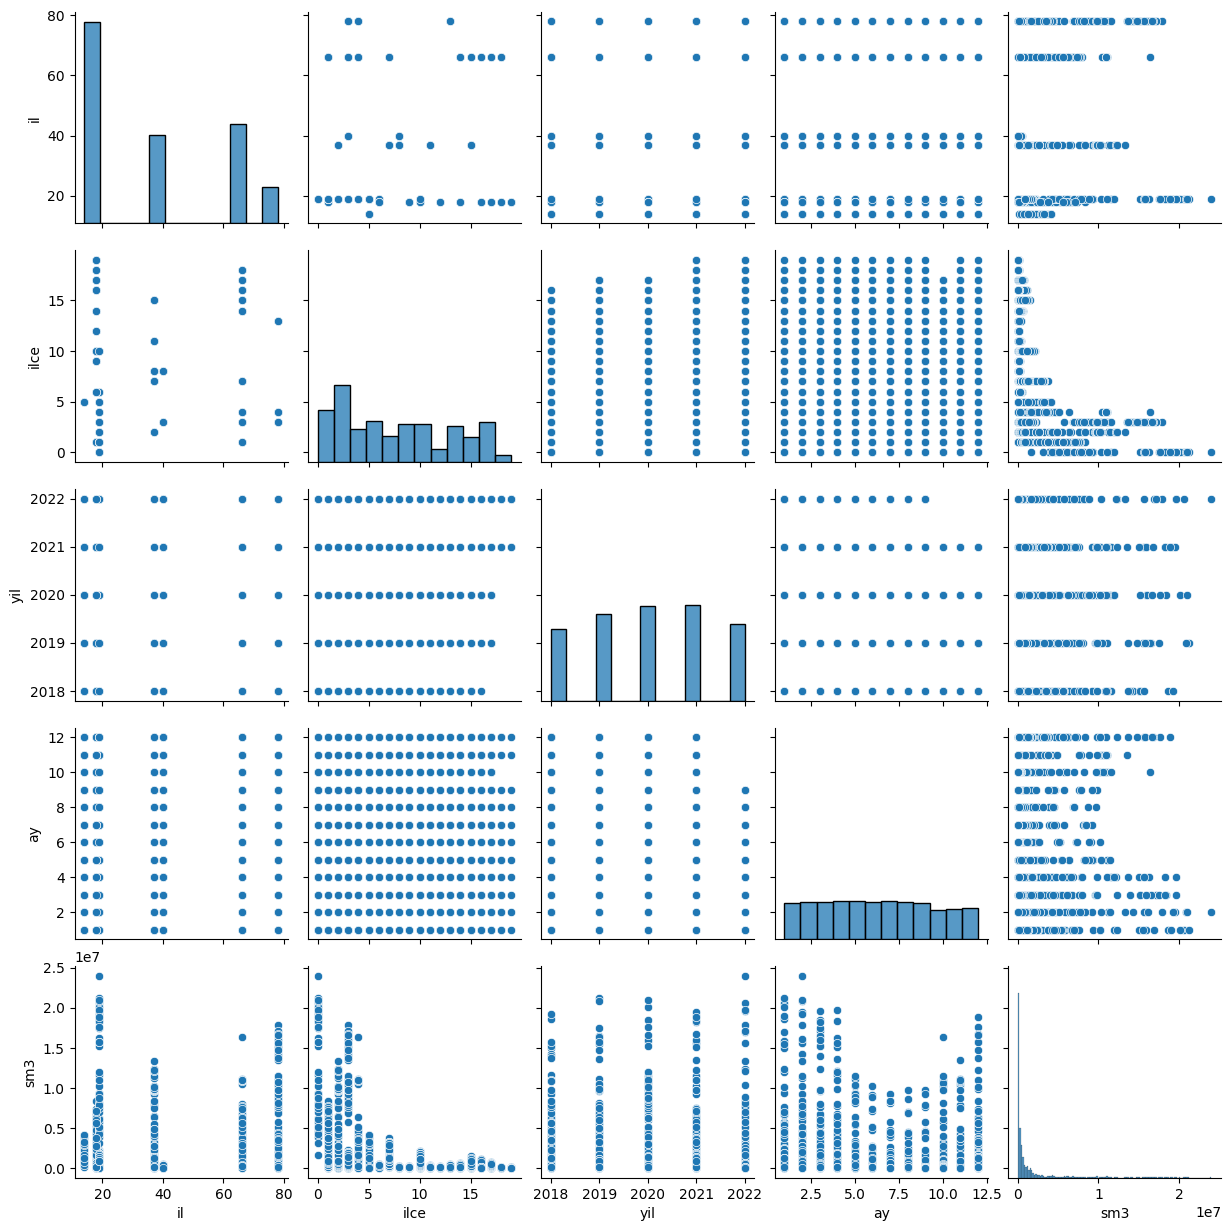

In [1385]:
sns.pairplot(dataset)

Yeni verisetlerini düzenli bir şekilde sırala

In [1386]:
yozgat = yozgat.sort_values(["yil","ilce","ay"])
kırşehir = kırşehir.sort_values(["ilce","yil","ay"])
bolu = bolu.sort_values(["ilce","yil","ay"])
çankırı = çankırı.sort_values(["ilce","yil","ay"])
kastamonu = kastamonu.sort_values(["ilce","yil","ay"])
karabük = karabük.sort_values(["ilce","yil","ay"])
çorum = çorum.sort_values(["ilce","yil","ay"])

In [1387]:
yozgat.reset_index(inplace=True)
yozgat.drop("index",axis = 1,inplace=True)
kırşehir.reset_index(inplace=True)
kırşehir.drop("index",axis = 1,inplace=True)
bolu.reset_index(inplace=True)
bolu.drop("index",axis = 1,inplace=True)
çankırı.reset_index(inplace=True)
çankırı.drop("index",axis = 1,inplace=True)
kastamonu.reset_index(inplace=True)
kastamonu.drop("index",axis = 1,inplace=True)
karabük.reset_index(inplace=True)
karabük.drop("index",axis = 1,inplace=True)
çorum.reset_index(inplace=True)
çorum.drop("index",axis = 1,inplace=True)

In [1388]:
yozgat.drop("ilce",axis = 1,inplace=True)
kırşehir.drop("ilce",axis = 1,inplace=True)
bolu.drop("ilce",axis = 1,inplace=True)
çankırı.drop("ilce",axis = 1,inplace=True)
kastamonu.drop("ilce",axis = 1,inplace=True)
karabük.drop("ilce",axis = 1,inplace=True)
çorum.drop("ilce",axis = 1,inplace=True)



In [1389]:
yozgat = pd.DataFrame(yozgat.groupby(["yil","ay"])["sm3"].sum())
kırşehir = pd.DataFrame(kırşehir.groupby(["yil","ay"])["sm3"].sum())
bolu = pd.DataFrame(bolu.groupby(["yil","ay"])["sm3"].sum())
çankırı = pd.DataFrame(çankırı.groupby(["yil","ay"])["sm3"].sum())
kastamonu = pd.DataFrame(kastamonu.groupby(["yil","ay"])["sm3"].sum())
karabük = pd.DataFrame(karabük.groupby(["yil","ay"])["sm3"].sum())
çorum = pd.DataFrame(çorum.groupby(["yil","ay"])["sm3"].sum())

In [1390]:
yozgat.reset_index(inplace=True)
kırşehir.reset_index(inplace=True)
bolu.reset_index(inplace=True)
çankırı.reset_index(inplace=True)
kastamonu.reset_index(inplace=True)
karabük.reset_index(inplace=True)
çorum.reset_index(inplace=True)


In [1391]:
yozgat["ds"] = yozgat["yil"].astype(str)+'-'+yozgat["ay"].astype(str)
yozgat["ds"] = pd.to_datetime(yozgat["ds"])

# kastamonu["ds"] = kastamonu["yil"].astype(str)+'-'+kastamonu["ay"].astype(str)
# kastamonu["ds"] = pd.to_datetime(kastamonu["ds"])

# karabük["ds"] = karabük["yil"].astype(str)+'-'+karabük["ay"].astype(str)
# karabük["ds"] = pd.to_datetime(karabük["ds"])
çorum["ds"] = çorum["yil"].astype(str)+'-'+çorum["ay"].astype(str)
çorum["ds"] = pd.to_datetime(çorum["ds"])

#yozgat["yil"] = pd.to_datetime(yozgat["yil"],format = '%Y')

In [1392]:
yozgat.head()

,yil,ay,sm3,ds
0,2018,1,1.047814e+07,2018-01-01
1,2018,2,1.189793e+07,2018-02-01
2,2018,3,8.604495e+06,2018-03-01
3,2018,4,6.762628e+06,2018-04-01
4,2018,5,3.406597e+06,2018-05-01


In [1393]:
yozgat.drop(["yil","ay"],axis = 1 , inplace = True)

# kastamonu.drop(["yil","ay"],axis = 1 , inplace = True)
# karabük.drop(["yil","ay"],axis = 1 , inplace = True)
çorum.drop(["yil","ay"],axis = 1 , inplace = True)



In [1394]:
yozgat["y"] = yozgat["sm3"]
yozgat.drop("sm3",axis = 1,inplace = True)

# kastamonu["y"] = kastamonu["sm3"]
# kastamonu.drop("sm3",axis = 1,inplace = True)

# karabük["y"] = karabük["sm3"]
# karabük.drop("sm3",axis = 1,inplace = True)

çorum["y"] = çorum["sm3"]
çorum.drop("sm3",axis = 1,inplace = True)

In [1395]:
yozgat.head()

,ds,y
0,2018-01-01,1.047814e+07
1,2018-02-01,1.189793e+07
2,2018-03-01,8.604495e+06
3,2018-04-01,6.762628e+06
4,2018-05-01,3.406597e+06


YOZGAT ilini Prophet İle tahmin edelim

In [1396]:
x = yozgat["ds"]
y = yozgat["y"]

In [1397]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(ax,y,test_size=0.3)
# model = PolynomialFeatures(degree=4)
# model.fit(x_train,y_train)

In [1398]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [1399]:
from prophet import Prophet
model = Prophet()


In [1400]:
model.fit(yozgat)

17:03:27 - cmdstanpy - INFO - Chain [1] start processing
17:03:27 - cmdstanpy - INFO - Chain [1] done processing


2022-2023 Yılları Arasını Tahmin edelim ve bunu bir verisetine aktaralım

In [1401]:
future = list()
for i in range(1,13):
    date = "2022-%02d" % i
    future.append([date])
future = pd.DataFrame(future)

future.columns = ["ds"]
future["ds"] = pd.to_datetime(future["ds"])

forecast = model.predict(future)
future.columns = ["ds"]
future["ds"] = pd.to_datetime(future["ds"],format = '%Y')
future

,ds
0,2022-01-01
1,2022-02-01
2,2022-03-01
3,2022-04-01
4,2022-05-01
5,2022-06-01
6,2022-07-01
7,2022-08-01
8,2022-09-01
9,2022-10-01


2022-2023 arası tahminlerimizi oluşturduk

In [1402]:
forecast = model.predict(future)

ds:tarihler
yhat:tahmin edilen değerler
yhat_lower:tahmin seviyesinin en alt
yhat_upper:tahmin seviyesinin en üst kısmı

In [1403]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-01,1.490186e+07,1.289273e+07,1.703592e+07
1,2022-02-01,1.650400e+07,1.459072e+07,1.843087e+07
2,2022-03-01,1.420308e+07,1.221765e+07,1.627214e+07
3,2022-04-01,1.315103e+07,1.100988e+07,1.510334e+07
4,2022-05-01,7.536967e+06,5.533386e+06,9.666134e+06
5,2022-06-01,4.185550e+06,2.146757e+06,6.264245e+06
6,2022-07-01,3.577714e+06,1.537473e+06,5.402077e+06
7,2022-08-01,3.594941e+06,1.508384e+06,5.759784e+06
8,2022-09-01,6.290888e+06,4.140959e+06,8.327992e+06
9,2022-10-01,1.918758e+07,1.703920e+07,2.119956e+07


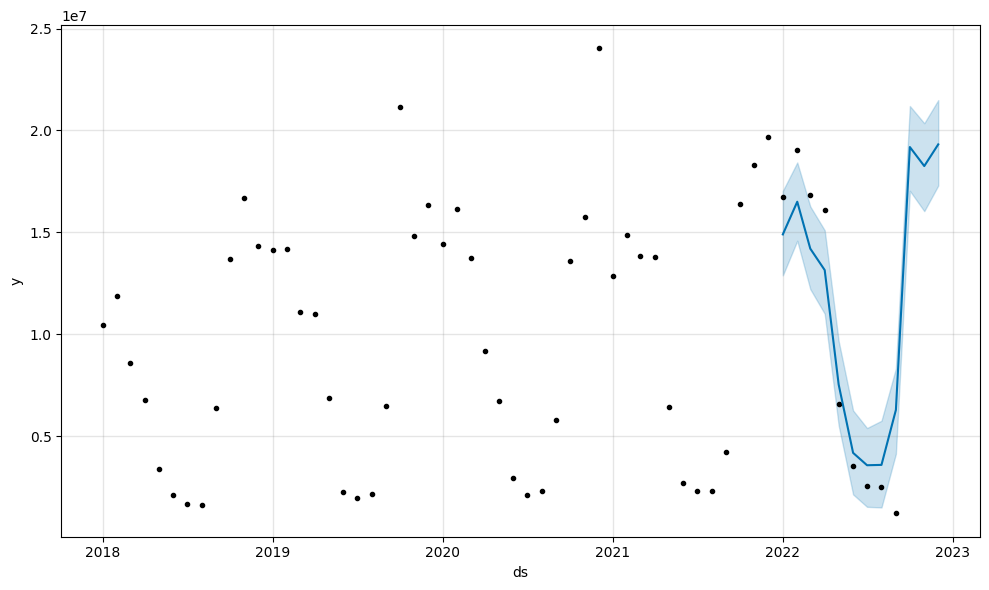

In [1404]:
model.plot(forecast)
plt.show()

In [1405]:
yozgat.loc[2:]

,ds,y
2,2018-03-01,8.604495e+06
3,2018-04-01,6.762628e+06
4,2018-05-01,3.406597e+06
5,2018-06-01,2.110416e+06
6,2018-07-01,1.673153e+06
7,2018-08-01,1.631986e+06
8,2018-09-01,6.399468e+06
9,2018-10-01,1.371463e+07
10,2018-11-01,1.668779e+07
11,2018-12-01,1.435118e+07


İlk 9 Veri grafiği

In [1406]:
plt.figure(figsize = (3, 3))
px.line(yozgat,x = yozgat["ds"].loc[48:],y = yozgat["y"].loc[48:])
#plt.legend(["forecast","actual"])

<Figure size 300x300 with 0 Axes>

In [1407]:
y_true = yozgat["y"].loc[48:56].values
y_predict = forecast["yhat"].loc[0:8].values

In [1408]:

px.line(forecast,x = forecast["ds"], y = forecast["yhat"])

In [1409]:
from sklearn.metrics import mean_absolute_error

In [1410]:
print("%.2f"%mean_absolute_error(y_true,y_predict))

2083077.75


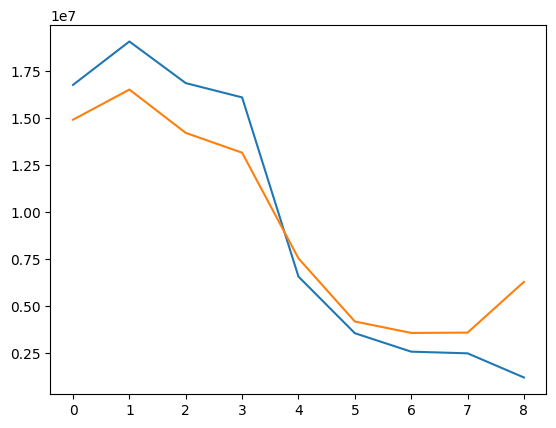

In [1411]:
plt.plot(y_true)
plt.plot(y_predict)

In [1412]:
r2_score(y_true,y_predict)

0.8782552085491774

In [1413]:
px.line(forecast,x = forecast["ds"] , y = forecast["yhat"])

Tahminler ile Doğru Verilerinin Grafikte Görünümü

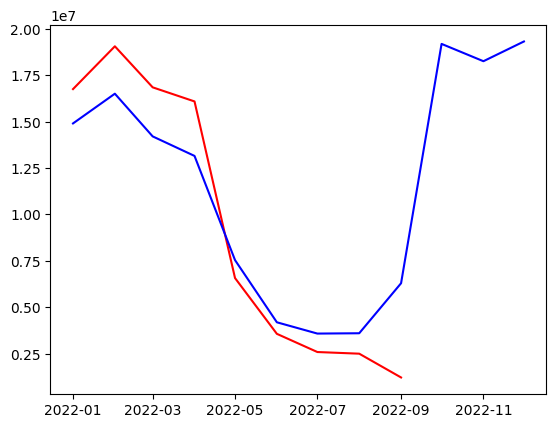

In [1414]:
plt.plot(yozgat["ds"].loc[48:],yozgat["y"].loc[48:],color = "red")
plt.plot(forecast["ds"],forecast["yhat"],color = "blue")

Kırşehir

In [1415]:
model = Prophet()


In [1416]:
kırşehir["ds"] = kırşehir["yil"].astype(str)+'-'+kırşehir["ay"].astype(str)
kırşehir["ds"] = pd.to_datetime(kırşehir["ds"])

In [1417]:
kırşehir.drop(["yil","ay"],axis = 1 , inplace = True)
kırşehir["y"] = kırşehir["sm3"]
kırşehir.drop("sm3",axis = 1,inplace = True)

In [1418]:
model.fit(kırşehir)

17:03:31 - cmdstanpy - INFO - Chain [1] start processing
17:03:31 - cmdstanpy - INFO - Chain [1] done processing


In [1419]:
future = list()
for i in range(1,13):
    date = "2022-%02d" % i
    future.append([date])
future = pd.DataFrame(future)

future.columns = ["ds"]
future["ds"] = pd.to_datetime(future["ds"])

forecast = model.predict(future)
future.columns = ["ds"]
future["ds"] = pd.to_datetime(future["ds"],format = '%Y')
future

,ds
0,2022-01-01
1,2022-02-01
2,2022-03-01
3,2022-04-01
4,2022-05-01
5,2022-06-01
6,2022-07-01
7,2022-08-01
8,2022-09-01
9,2022-10-01


In [1420]:
forecast = model.predict(future)

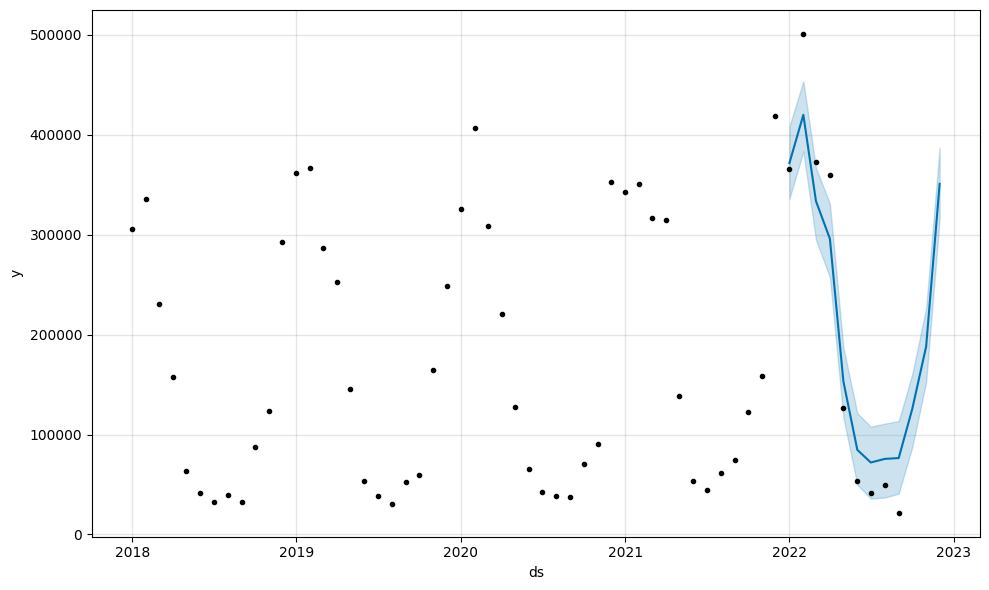

In [1421]:
model.plot(forecast)
plt.show()

In [1422]:
px.line(kırşehir,x = kırşehir["ds"],y = kırşehir["y"])

In [1423]:
y_true = kırşehir["y"].loc[48:56].values
y_predict = forecast["yhat"].loc[0:8].values

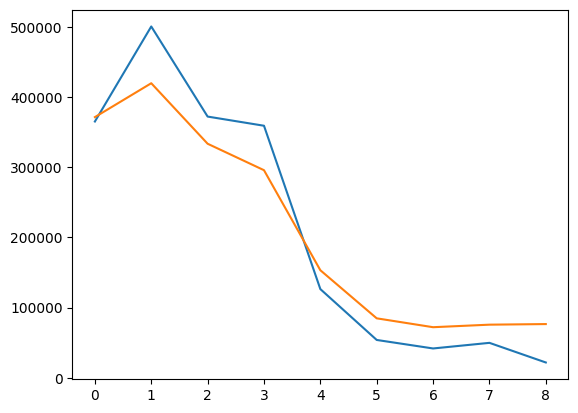

In [1424]:
plt.plot(y_true)
plt.plot(y_predict)

In [1425]:
r2_score(y_true,y_predict)

0.9339716418123835

In [1426]:
print("%.2f"%mean_absolute_error(y_true,y_predict))

39777.45


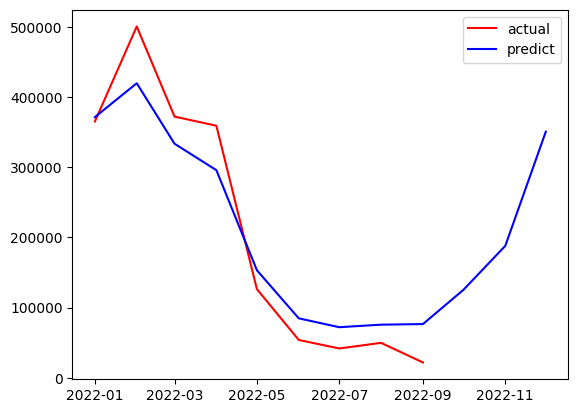

In [1427]:
plt.plot(kırşehir["ds"].loc[48:],kırşehir["y"].loc[48:],color = "red")
plt.plot(forecast["ds"],forecast["yhat"],color = "blue")

plt.legend(["actual","predict"])

Bolu 

In [1428]:
model = Prophet()


In [1429]:
bolu["ds"] = bolu["yil"].astype(str)+'-'+bolu["ay"].astype(str)
bolu["ds"] = pd.to_datetime(bolu["ds"]) 
bolu.drop(["yil","ay"],axis = 1 , inplace = True)
bolu["y"] = bolu["sm3"]
bolu.drop("sm3",axis = 1,inplace = True)

In [1430]:
model.fit(bolu)

17:03:34 - cmdstanpy - INFO - Chain [1] start processing
17:03:34 - cmdstanpy - INFO - Chain [1] done processing


In [1431]:
future = list()
for i in range(1,13):
    date = "2022-%02d" % i
    future.append([date])
future = pd.DataFrame(future)

future.columns = ["ds"]
future["ds"] = pd.to_datetime(future["ds"])

forecast_bolu = model.predict(future)
future.columns = ["ds"]
future["ds"] = pd.to_datetime(future["ds"],format = '%Y')
future

,ds
0,2022-01-01
1,2022-02-01
2,2022-03-01
3,2022-04-01
4,2022-05-01
5,2022-06-01
6,2022-07-01
7,2022-08-01
8,2022-09-01
9,2022-10-01


In [1432]:
forecast_bolu = model.predict(future)

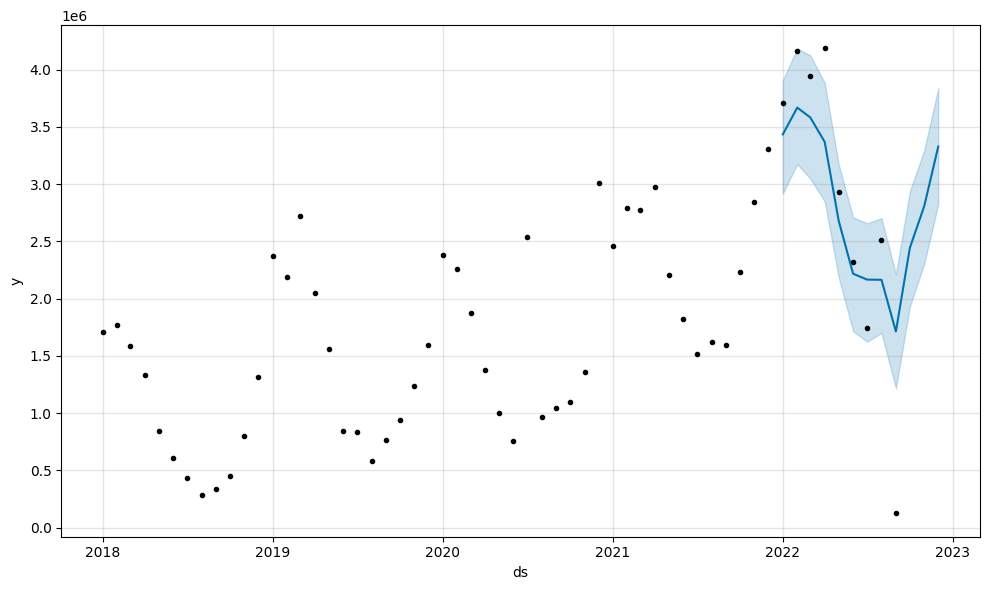

In [1433]:
model.plot(forecast_bolu)
plt.show()

In [1434]:
px.line(bolu,x = bolu["ds"],y = bolu["y"])

In [1435]:
bolu.loc[48:56]

,ds,y
48,2022-01-01,3.706453e+06
49,2022-02-01,4.162116e+06
50,2022-03-01,3.940995e+06
51,2022-04-01,4.185199e+06
52,2022-05-01,2.931322e+06
53,2022-06-01,2.320751e+06
54,2022-07-01,1.744153e+06
55,2022-08-01,2.515832e+06
56,2022-09-01,1.240017e+05


In [1436]:
forecast_bolu.loc[0:8]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,2.496134e+06,2.919644e+06,3.908277e+06,2.496134e+06,2.496134e+06,9.386368e+05,9.386368e+05,9.386368e+05,9.386368e+05,9.386368e+05,9.386368e+05,0.0,0.0,0.0,3.434771e+06
1,2022-02-01,2.535688e+06,3.175147e+06,4.185333e+06,2.535688e+06,2.535688e+06,1.132632e+06,1.132632e+06,1.132632e+06,1.132632e+06,1.132632e+06,1.132632e+06,0.0,0.0,0.0,3.668320e+06
2,2022-03-01,2.571414e+06,3.048675e+06,4.124520e+06,2.571414e+06,2.571414e+06,1.011224e+06,1.011224e+06,1.011224e+06,1.011224e+06,1.011224e+06,1.011224e+06,0.0,0.0,0.0,3.582638e+06
3,2022-04-01,2.610968e+06,2.848984e+06,3.884616e+06,2.610968e+06,2.610968e+06,7.577959e+05,7.577959e+05,7.577959e+05,7.577959e+05,7.577959e+05,7.577959e+05,0.0,0.0,0.0,3.368764e+06
4,2022-05-01,2.649246e+06,2.186441e+06,3.173319e+06,2.649246e+06,2.649246e+06,3.235353e+04,3.235353e+04,3.235353e+04,3.235353e+04,3.235353e+04,3.235353e+04,0.0,0.0,0.0,2.681599e+06
5,2022-06-01,2.688800e+06,1.715981e+06,2.709605e+06,2.688800e+06,2.688800e+06,-4.711103e+05,-4.711103e+05,-4.711103e+05,-4.711103e+05,-4.711103e+05,-4.711103e+05,0.0,0.0,0.0,2.217689e+06
6,2022-07-01,2.727077e+06,1.624142e+06,2.657836e+06,2.727077e+06,2.727077e+06,-5.606509e+05,-5.606509e+05,-5.606509e+05,-5.606509e+05,-5.606509e+05,-5.606509e+05,0.0,0.0,0.0,2.166427e+06
7,2022-08-01,2.766631e+06,1.699454e+06,2.702884e+06,2.766631e+06,2.766631e+06,-6.019943e+05,-6.019943e+05,-6.019943e+05,-6.019943e+05,-6.019943e+05,-6.019943e+05,0.0,0.0,0.0,2.164637e+06
8,2022-09-01,2.806185e+06,1.216629e+06,2.215034e+06,2.806185e+06,2.806185e+06,-1.093139e+06,-1.093139e+06,-1.093139e+06,-1.093139e+06,-1.093139e+06,-1.093139e+06,0.0,0.0,0.0,1.713046e+06


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


517285.12


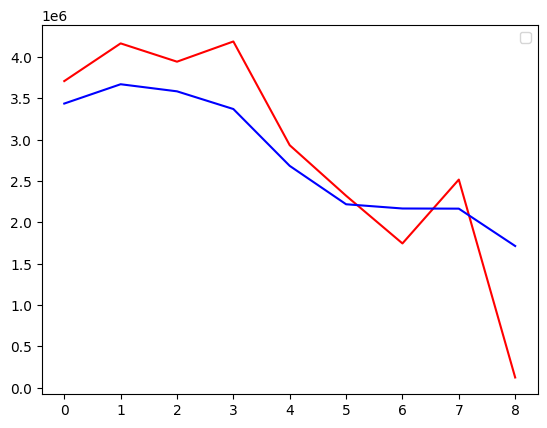

In [1437]:
y_true = bolu["y"].loc[48:56].values
y_predict = forecast_bolu["yhat"].loc[0:8].values
print("%.2f"%mean_absolute_error(y_true,y_predict))
plt.plot(y_true,color = "red")
plt.plot(y_predict,color = "blue")
plt.legend()
#517285.12

In [1438]:
r2_score(y_true,y_predict)

0.7229149950854812

In [1439]:
model = Prophet()

In [1440]:
çankırı["ds"] = çankırı["yil"].astype(str)+'-'+çankırı["ay"].astype(str)
çankırı["ds"] = pd.to_datetime(çankırı["ds"])
çankırı.drop(["yil","ay"],axis = 1 , inplace = True)
çankırı["y"] = çankırı["sm3"]
çankırı.drop("sm3",axis = 1,inplace = True)

In [1441]:
model.fit(çankırı)

17:03:37 - cmdstanpy - INFO - Chain [1] start processing
17:03:37 - cmdstanpy - INFO - Chain [1] done processing


In [1442]:
future = list()
for i in range(1,13):
    date = "2022-%02d" % i
    future.append([date])
future = pd.DataFrame(future)

future.columns = ["ds"]
future["ds"] = pd.to_datetime(future["ds"])

forecast = model.predict(future)
future.columns = ["ds"]
future["ds"] = pd.to_datetime(future["ds"],format = '%Y')
future

,ds
0,2022-01-01
1,2022-02-01
2,2022-03-01
3,2022-04-01
4,2022-05-01
5,2022-06-01
6,2022-07-01
7,2022-08-01
8,2022-09-01
9,2022-10-01


In [1443]:
forecast = model.predict(future)

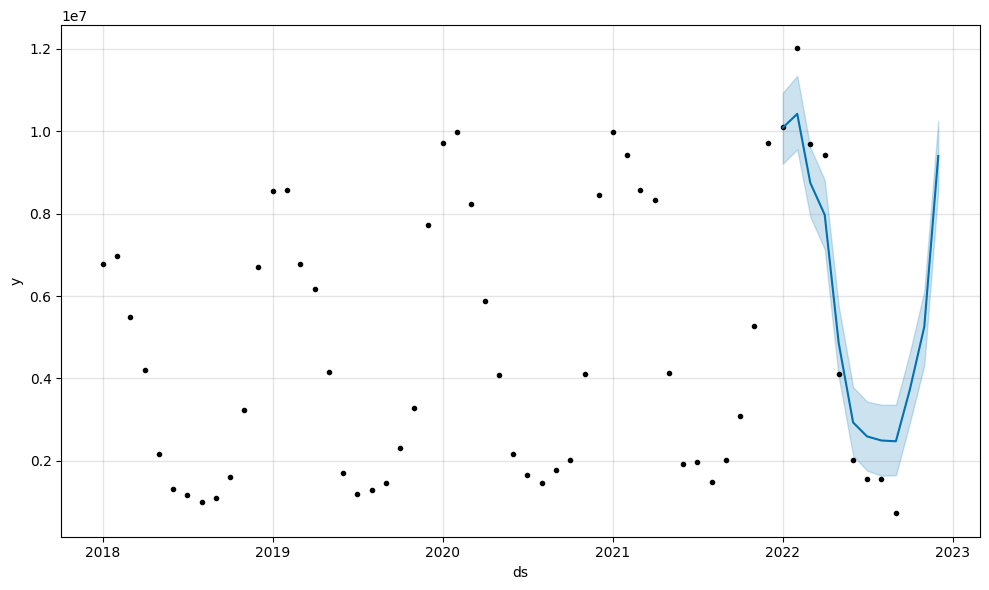

In [1444]:
model.plot(forecast)
plt.show()

In [1445]:
forecast["yhat"]

0     1.008474e+07
1     1.041849e+07
2     8.746048e+06
3     7.970994e+06
4     4.863085e+06
5     2.933445e+06
6     2.594405e+06
7     2.495227e+06
8     2.476581e+06
9     3.731391e+06
10    5.252642e+06
11    9.396694e+06
Name: yhat, dtype: float64

In [1446]:
bolu.loc[48:56]

,ds,y
48,2022-01-01,3.706453e+06
49,2022-02-01,4.162116e+06
50,2022-03-01,3.940995e+06
51,2022-04-01,4.185199e+06
52,2022-05-01,2.931322e+06
53,2022-06-01,2.320751e+06
54,2022-07-01,1.744153e+06
55,2022-08-01,2.515832e+06
56,2022-09-01,1.240017e+05


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1039900.80


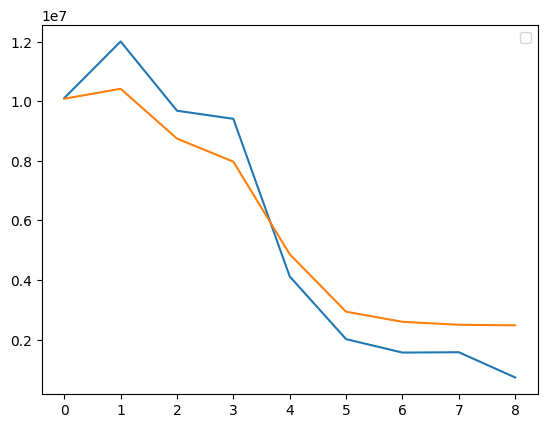

In [1447]:
y_true = çankırı["y"].loc[48:56].values
y_predict = forecast["yhat"].loc[0:8].values
print("%.2f"%mean_absolute_error(y_true,y_predict))
plt.plot(y_true)
plt.plot(y_predict)
plt.legend()

### MAKİNE ÖĞRENMESİ

In [1448]:
from sklearn.model_selection import train_test_split

In [1449]:
y = np.array(bolu["y"].values).reshape(-1,1)
x = np.array(bolu["ds"].values).reshape(-1,1)

In [1450]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [1451]:
x_train.shape

(39, 1)

In [1452]:
x_test.shape

(18, 1)

In [1453]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [1454]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [1455]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [1456]:
model = Sequential()

In [1457]:
model.add(Dense(25,activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(15,activation = "relu"))

model.add(Dropout(0.5))
model.add(Dense(35,activation = "relu"))

model.add(Dropout(0.5))
model.add(Dense(15,activation = "relu"))

model.add(Dropout(0.5))
model.add(Dense(25,activation = "relu"))

model.add(Dropout(0.5))

model.add(Dense(1))
model.compile(optimizer = "adam",loss = "mse")

In [1458]:
# model.fit(x= x_train,y = y_train ,
#            epochs = 40 ,
#            validation_data=(x_test,y_test))
# tahmin = model.predict(x_test)
# mean_absolute_error(y_test,tahmin)
#model.score(x_train,y_train)
bolu["y"].mean()

1800156.8836361866

In [1459]:
stopping = EarlyStopping(monitor="val_loss",mode = "min",verbose = 1 ,patience=25)
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8 * 10 ** (epoch / 20))

In [1460]:
import tensorflow as tf

In [1461]:
model.fit(x= x_train,y = y_train ,
          epochs = 6010,
          validation_data=(x_test,y_test),
          callbacks = [stopping])

Epoch 1/6010
2/2 [==============================] - 1s 104ms/step - loss: 4751366291456.0000 - val_loss: 3152446226432.0000
Epoch 2/6010
2/2 [==============================] - 0s 24ms/step - loss: 4751365767168.0000 - val_loss: 3152446226432.0000
Epoch 3/6010
2/2 [==============================] - 0s 24ms/step - loss: 4751365767168.0000 - val_loss: 3152446226432.0000
Epoch 4/6010
2/2 [==============================] - 0s 25ms/step - loss: 4751365242880.0000 - val_loss: 3152446226432.0000
Epoch 5/6010
2/2 [==============================] - 0s 16ms/step - loss: 4751365242880.0000 - val_loss: 3152446226432.0000
Epoch 6/6010
2/2 [==============================] - 0s 16ms/step - loss: 4751365242880.0000 - val_loss: 3152446226432.0000
Epoch 7/6010
2/2 [==============================] - 0s 16ms/step - loss: 4751365242880.0000 - val_loss: 3152445964288.0000
Epoch 8/6010
2/2 [==============================] - 0s 16ms/step - loss: 4751365242880.0000 - val_loss: 3152445964288.0000
Epoch 9/6010
2/

<AxesSubplot:>

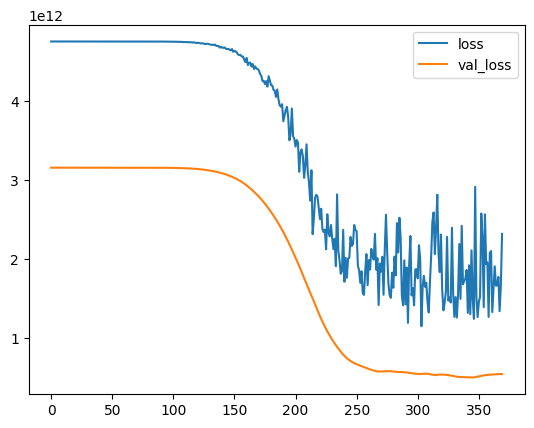

In [1462]:
kayip = pd.DataFrame(model.history.history)
kayip.plot()

In [1463]:
mean_absolute_error(y_test,tahmin)

1581157.800810323

In [1464]:
# kayiplar = list()
# for i in range(50,100,50):
#     model.fit(x= x_train,y = y_train,
#     epochs = i ,
#     validation_data=(x_test,y_test))
#           #callbacks = [stopping])
#     kayiplar.append([model.history.history])

In [1465]:
# mean_absolute_error(y_test,tahmin)